# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

According to the article, the dataset was collected from **17 campaigns** that occurred between May 2008 and November 2010.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import accuracy_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import warnings

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



1. First, we will check for any null values:

In [4]:
# check the amount of missing values for each column
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**Observations:**
- None of the columns have any missing values

2. While the data description already contains data types for each category, it would be beneficial to view each feature and it's distribution using a for each loop

In [5]:
# extracting columns with object data type
object_columns = df.select_dtypes(include=['object'])

In [6]:
object_columns

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [7]:
# using for each loop to display value counts for each class per feature
for col in object_columns:
    counts = df[col].value_counts()
    perc = (df[col].value_counts(normalize=True) * 100).round(1).astype(str) + '%'
    print('Feature: ' + col)
    print(pd.DataFrame({'count': counts, 'percentage': perc}), '\n\n')
    

Feature: job
               count percentage
admin.         10422      25.3%
blue-collar     9254      22.5%
technician      6743      16.4%
services        3969       9.6%
management      2924       7.1%
retired         1720       4.2%
entrepreneur    1456       3.5%
self-employed   1421       3.5%
housemaid       1060       2.6%
unemployed      1014       2.5%
student          875       2.1%
unknown          330       0.8% 


Feature: marital
          count percentage
married   24928      60.5%
single    11568      28.1%
divorced   4612      11.2%
unknown      80       0.2% 


Feature: education
                     count percentage
university.degree    12168      29.5%
high.school           9515      23.1%
basic.9y              6045      14.7%
professional.course   5243      12.7%
basic.4y              4176      10.1%
basic.6y              2292       5.6%
unknown               1731       4.2%
illiterate              18       0.0% 


Feature: default
         count percentage
no    

**Observations**
- Categorical features will likely need to be converted to numerical features before we build our models.
- Depending on the nature of the categorial feature (ex. does it have inherent ranking), we will need to use the appropriate encoding method:
    - Use ordinal encoding to preserve ranking 
    - Use one-hot encoding for features without inherent ranking
- Will convert Target Class from no/yes to 0/1

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Business Objective:**

Banks aim to enhance the effectiveness and efficiency of their marketing campaigns focused on promoting term deposits. To achieve this, the business objective is to build models that can accurately predict which clients are likely to subscribe to a term deposit based on the list of features shown above. In doing so, these models can help identify features that contribute to client subscription, thereby improving the bank's ability to market more efficiently and allocate resources better. 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

### 5a. Data Exploration

In [9]:
# According to the data description, bank information (bank client features) corresponds to the first seven features
# Creating a new dataframe with only these seven features
df_bank_features = df.iloc[: , : 7]
df_bank_features

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes
...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no
41184,46,blue-collar,married,professional.course,no,no,no
41185,56,retired,married,university.degree,no,yes,no
41186,44,technician,married,professional.course,no,no,no


In [10]:
df_bank_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  int64 
 1   job        41188 non-null  object
 2   marital    41188 non-null  object
 3   education  41188 non-null  object
 4   default    41188 non-null  object
 5   housing    41188 non-null  object
 6   loan       41188 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.2+ MB


**Observations:**
- Every feature besides age is categorical
- Further exploration required to determine which features have ordinal ranking

In [11]:
# extracting columns with object data type
bank_object_columns = df_bank_features.select_dtypes(include=['object'])

In [12]:
# using for each loop to display value counts for each class per feature
for col in bank_object_columns:
    counts = df[col].value_counts()
    perc = (df[col].value_counts(normalize=True) * 100).round(1).astype(str) + '%'
    print('Feature: ' + col)
    print(pd.DataFrame({'count': counts, 'percentage': perc}), '\n\n')

Feature: job
               count percentage
admin.         10422      25.3%
blue-collar     9254      22.5%
technician      6743      16.4%
services        3969       9.6%
management      2924       7.1%
retired         1720       4.2%
entrepreneur    1456       3.5%
self-employed   1421       3.5%
housemaid       1060       2.6%
unemployed      1014       2.5%
student          875       2.1%
unknown          330       0.8% 


Feature: marital
          count percentage
married   24928      60.5%
single    11568      28.1%
divorced   4612      11.2%
unknown      80       0.2% 


Feature: education
                     count percentage
university.degree    12168      29.5%
high.school           9515      23.1%
basic.9y              6045      14.7%
professional.course   5243      12.7%
basic.4y              4176      10.1%
basic.6y              2292       5.6%
unknown               1731       4.2%
illiterate              18       0.0% 


Feature: default
         count percentage
no    

**Observations:**
- Among the categorical features, 'education' can be considered to have ordinal ranking. Therefore, we should preserve this ranking when converting to a numerical feature
- The other features do not have any ordinal ranking so we can apply one-hot encoding to these features

### 5b. Encoding Categorical Features

1. Encoding categorical features with ordinal ranking:
- Education

In [13]:
# First, define list of educations with numerical rankings
# Purpose: explicitly specify order for OrdinalEncoder when assigning numerical value
education_list = [
    'illiterate',
    'basic.4y',
    'basic.6y',
    'basic.9y',
    'high.school',
    'professional.course',
    'university.degree',
    'unknown'
]

In [14]:
# Instantiate OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[education_list], dtype=int)

# Fit and transform education feature in original dataframe
# OrdinalEncoder expects 2D array as input, need to add [[]] even when dealing with a single column
df_bank_features['education'] = ordinal_encoder.fit_transform(df_bank_features[['education']])

In [15]:
df_bank_features

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,1,no,no,no
1,57,services,married,4,unknown,no,no
2,37,services,married,4,no,yes,no
3,40,admin.,married,2,no,no,no
4,56,services,married,4,no,no,yes
...,...,...,...,...,...,...,...
41183,73,retired,married,5,no,yes,no
41184,46,blue-collar,married,5,no,no,no
41185,56,retired,married,6,no,yes,no
41186,44,technician,married,5,no,no,no


In [16]:
# verify that transformation worked properly
df_bank_features['education'].value_counts()

6    12168
4     9515
3     6045
5     5243
1     4176
2     2292
7     1731
0       18
Name: education, dtype: int64

In [17]:
# features before applying one-hot encoding
df_bank_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  int64 
 1   job        41188 non-null  object
 2   marital    41188 non-null  object
 3   education  41188 non-null  int64 
 4   default    41188 non-null  object
 5   housing    41188 non-null  object
 6   loan       41188 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.2+ MB


2. One-hot encode remainder categorical features

In [18]:
# One hot encoding using pd.get_dummies
# Originally used OneHotEncoder but some columns were missing after applying OneHotEncoder
ohe_features = ['job', 'marital', 'default', 'housing', 'loan']

df_bank_features_final = pd.get_dummies(df_bank_features, columns=ohe_features)

In [19]:
df_bank_features_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                41188 non-null  int64
 1   education          41188 non-null  int64
 2   job_admin.         41188 non-null  uint8
 3   job_blue-collar    41188 non-null  uint8
 4   job_entrepreneur   41188 non-null  uint8
 5   job_housemaid      41188 non-null  uint8
 6   job_management     41188 non-null  uint8
 7   job_retired        41188 non-null  uint8
 8   job_self-employed  41188 non-null  uint8
 9   job_services       41188 non-null  uint8
 10  job_student        41188 non-null  uint8
 11  job_technician     41188 non-null  uint8
 12  job_unemployed     41188 non-null  uint8
 13  job_unknown        41188 non-null  uint8
 14  marital_divorced   41188 non-null  uint8
 15  marital_married    41188 non-null  uint8
 16  marital_single     41188 non-null  uint8
 17  marital_unkn

In [20]:
# verify categorical features are encoded properly
# using for each loop to display value counts for each class per feature
for col in df_bank_features_final.columns:
    counts = df_bank_features_final[col].value_counts()
    perc = (df_bank_features_final[col].value_counts(normalize=True) * 100).round(1).astype(str) + '%'
    print('Feature: ' + col)
    print(pd.DataFrame({'count': counts, 'percentage': perc}), '\n\n')

Feature: age
    count percentage
31   1947       4.7%
32   1846       4.5%
33   1833       4.5%
36   1780       4.3%
35   1759       4.3%
..    ...        ...
89      2       0.0%
91      2       0.0%
94      1       0.0%
87      1       0.0%
95      1       0.0%

[78 rows x 2 columns] 


Feature: education
   count percentage
6  12168      29.5%
4   9515      23.1%
3   6045      14.7%
5   5243      12.7%
1   4176      10.1%
2   2292       5.6%
7   1731       4.2%
0     18       0.0% 


Feature: job_admin.
   count percentage
0  30766      74.7%
1  10422      25.3% 


Feature: job_blue-collar
   count percentage
0  31934      77.5%
1   9254      22.5% 


Feature: job_entrepreneur
   count percentage
0  39732      96.5%
1   1456       3.5% 


Feature: job_housemaid
   count percentage
0  40128      97.4%
1   1060       2.6% 


Feature: job_management
   count percentage
0  38264      92.9%
1   2924       7.1% 


Feature: job_retired
   count percentage
0  39468      95.8%
1   1720     

In [21]:
# features after applying one-hot encoding
df_bank_features_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                41188 non-null  int64
 1   education          41188 non-null  int64
 2   job_admin.         41188 non-null  uint8
 3   job_blue-collar    41188 non-null  uint8
 4   job_entrepreneur   41188 non-null  uint8
 5   job_housemaid      41188 non-null  uint8
 6   job_management     41188 non-null  uint8
 7   job_retired        41188 non-null  uint8
 8   job_self-employed  41188 non-null  uint8
 9   job_services       41188 non-null  uint8
 10  job_student        41188 non-null  uint8
 11  job_technician     41188 non-null  uint8
 12  job_unemployed     41188 non-null  uint8
 13  job_unknown        41188 non-null  uint8
 14  marital_divorced   41188 non-null  uint8
 15  marital_married    41188 non-null  uint8
 16  marital_single     41188 non-null  uint8
 17  marital_unkn

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

### 6a. Examining Target Variable Distribution

Before we perform Train/Test Split, we should visualize the distribution of our target variable as this will impact the performance of our models that we will build.

In [22]:
# converting target variables represented as strings ('Yes' or 'No') into binary numerical values (1 or 0)
df['y'] = np.where(df['y'] == 'yes', 1, 0)

In [23]:
# Assigning target variable to y
y = df['y']

In [24]:
# Visualizing the distribution

# calculate distribution
distribution = df['y'].value_counts()

# More useful to view distribution in terms of proportions
proportions = distribution/distribution.sum()

# print out proportions
print(proportions)

0    0.887346
1    0.112654
Name: y, dtype: float64


In [25]:
# Creating DataFrame for proportions
proportions_df = proportions.reset_index()
proportions_df

,index,y
0,0,0.887346
1,1,0.112654


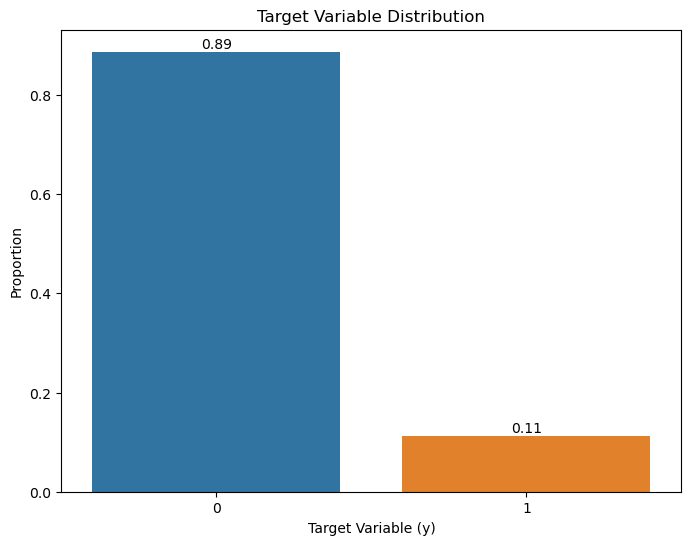

In [26]:
# Renaming the columns
proportions_df.columns = ['target_variable', 'proportion']

# Plot using seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='target_variable', y='proportion', data=proportions_df)

# Add annotations
for i, row in proportions_df.iterrows():
    ax.text(i, row['proportion'], f'{row["proportion"]:.2f}', color='black', ha="center", va="bottom")

    
plt.xlabel('Target Variable (y)')
plt.ylabel('Proportion')
plt.title('Target Variable Distribution')
plt.show()

**Observations:**
- As we can see, there is a significant class imbalance with minority class (1) representing 11%
- Class imbalance needs to be taken into consideration when assessing performance of our models
- We can add 'stratify' parameter to ensure that both the training and testing sets have similar distribution of target class

### 6b. Performing Train/Test Split 

Now we perform train/test split. We will add 'stratify' parameter for reasons described above.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_bank_features_final, y, test_size = 0.3, stratify = y, random_state = 42)

In [28]:
# Distribution of y_train
y_train.value_counts(normalize = True)

0    0.887343
1    0.112657
Name: y, dtype: float64

In [29]:
# Distribution of y_test
y_test.value_counts(normalize = True)

0    0.887351
1    0.112649
Name: y, dtype: float64

**Note:**
- I experimented without using 'stratify' parameter and the distributions were relatively similar. However, it could have just been a coicidence so I have included the parameter.

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [30]:
# Use target variable's value_counts() as the baseline performance
y.value_counts(normalize = True)

0    0.887346
1    0.112654
Name: y, dtype: float64

**Observations:**
- We will consider the baseline performance in terms of the majority class (0). From the observed distributions, we can see that 88.7% of the samples belong to class 0 while 11.3% of the samples belong to class 1.
- Therefore, the accuracy of this baseline model is equal to the proportion of the **majority class** which is **88.7%**.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [31]:
warnings.filterwarnings('ignore')

In [32]:
# Creating lists to store fit time, train accuracy and test accuracy
# These will be used for reporting results in dataframe
model_list = []
time_list = []
train_accuracy_list = []
test_accuracy_list = []

### Logistic Regression Base Model:

In [33]:
# Initialize Logistic Regression object with default parameters, except for setting random_state = 42
# Received convergence warning so setting max_iter to 10000 instead of using default
lgr_base_model = LogisticRegression(random_state = 42, max_iter = 10000)

# Want to compute fit time of model
# Measuring starting time and ending time, then taking the difference to obtain fit time
start_time = time.time()

# Fitting model
lgr_base_model.fit(X_train, y_train)

end_time = time.time()

# Calculating fit time of model
lgr_fit_time = end_time - start_time

print(f"Time taken to train Logistic Regression model: {lgr_fit_time:.4f} seconds")

Time taken to train Logistic Regression model: 0.5930 seconds


### Problem 9: Score the Model

What is the accuracy of your model?

### 9a. Accuracy of Logistic Regression Model

In [34]:
# Predictions using train set
lgr_base_train_predictions = lgr_base_model.predict(X_train)

# Predictions using test set
lgr_base_test_predictions = lgr_base_model.predict(X_test)

# Compute accuracy score for Train and Test
lgr_base_train_accuracy = accuracy_score(y_train, lgr_base_train_predictions)
lgr_base_test_accuracy = accuracy_score(y_test, lgr_base_test_predictions)

print(f"Training accuracy: {lgr_base_train_accuracy:.4f}")
print(f"Testing accuracy: {lgr_base_test_accuracy:.4f}")

Training accuracy: 0.8873
Testing accuracy: 0.8874


**Observations:**
- Accuracy for Logistic Regression model is comparable to the baseline accuracy

### 9b. Viewing Classification Report

Want to view other metrics (precision, recall, f1) since accuracy may not be a reliable metric to use

In [35]:
print(classification_report(y_test, lgr_base_test_predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10965
           1       0.00      0.00      0.00      1392

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.83     12357



**Observations:**
- Precision, recall, f1 are all 0 for the minority class

In [36]:
# append results into respective list
model_list.append('Logistic Regression')
time_list.append(lgr_fit_time)
train_accuracy_list.append(lgr_base_train_accuracy)
test_accuracy_list.append(lgr_base_test_accuracy)

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [37]:
warnings.filterwarnings('ignore')

Now we will build the following models and compare performances among the models:
- KNN
- Decision Tree
- SVM

### 10a. KNN Base Model

In [38]:
# Initialize KNeighborsClassifier object with default parameters
knn_base_model = KNeighborsClassifier()

# Want to compute fit time of model
# Measuring starting time and ending time, then taking the difference to obtain fit time
start_time = time.time()

# Fitting model
knn_base_model.fit(X_train, y_train)

end_time = time.time()

# Calculating fit time of model
knn_fit_time = end_time - start_time

print(f"Time taken to train KNeighbors model: {knn_fit_time:.4f} seconds")

Time taken to train KNeighbors model: 0.0047 seconds


 **Computing Train and Test accuracy:**

In [39]:
# Predictions using train set
knn_base_train_predictions = knn_base_model.predict(X_train)

# Predictions using test set
knn_base_test_predictions = knn_base_model.predict(X_test)

# Compute accuracy score for Train and Test
knn_base_train_accuracy = accuracy_score(y_train, knn_base_train_predictions)
knn_base_test_accuracy = accuracy_score(y_test, knn_base_test_predictions)

print(f"Training accuracy: {knn_base_train_accuracy:.4f}")
print(f"Testing accuracy: {knn_base_test_accuracy:.4f}")

Training accuracy: 0.8895
Testing accuracy: 0.8774


**Viewing classification report:**

In [40]:
print(classification_report(y_test, knn_base_test_predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     10965
           1       0.32      0.08      0.12      1392

    accuracy                           0.88     12357
   macro avg       0.60      0.53      0.53     12357
weighted avg       0.83      0.88      0.84     12357



**Observations:**
- Slight increase across all metrics

In [41]:
# append results into respective list
model_list.append('KNN')
time_list.append(knn_fit_time)
train_accuracy_list.append(knn_base_train_accuracy)
test_accuracy_list.append(knn_base_test_accuracy)

### 10b. Decision Tree Base Model

In [42]:
# Initialize KNeighborsClassifier object with default parameters
decision_tree_base_model = DecisionTreeClassifier()

# Want to compute fit time of model
# Measuring starting time and ending time, then taking the difference to obtain fit time
start_time = time.time()

# Fitting model
decision_tree_base_model.fit(X_train, y_train)

end_time = time.time()

# Calculating fit time of model
decision_tree_fit_time = end_time - start_time

print(f"Time taken to train Decision_Tree model: {decision_tree_fit_time:.4f} seconds")

Time taken to train Decision_Tree model: 0.0954 seconds


 **Computing Train and Test accuracy:**

In [43]:
# Predictions using train set
decision_tree_base_train_predictions = decision_tree_base_model.predict(X_train)

# Predictions using test set
decision_tree_base_test_predictions = decision_tree_base_model.predict(X_test)

# Compute accuracy score for Train and Test
decision_tree_base_train_accuracy = accuracy_score(y_train, decision_tree_base_train_predictions)
decision_tree_base_test_accuracy = accuracy_score(y_test, decision_tree_base_test_predictions)

print(f"Training accuracy: {decision_tree_base_train_accuracy:.4f}")
print(f"Testing accuracy: {decision_tree_base_test_accuracy:.4f}")

Training accuracy: 0.9188
Testing accuracy: 0.8650


**Viewing classification report:**

In [44]:
print(classification_report(y_test, decision_tree_base_test_predictions))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93     10965
           1       0.24      0.09      0.13      1392

    accuracy                           0.87     12357
   macro avg       0.57      0.53      0.53     12357
weighted avg       0.82      0.87      0.84     12357



**Observations:**
- Metric scores comparable to KNN model

In [45]:
# append results into respective list
model_list.append('Decision Tree')
time_list.append(decision_tree_fit_time)
train_accuracy_list.append(decision_tree_base_train_accuracy)
test_accuracy_list.append(decision_tree_base_test_accuracy)

### 10c. SVM Base Model

In [46]:
# Initialize SVM object with default parameters
svm_base_model = SVC()

# Want to compute fit time of model
# Measuring starting time and ending time, then taking the difference to obtain fit time
start_time = time.time()

# Fitting model
svm_base_model.fit(X_train, y_train)

end_time = time.time()

# Calculating fit time of model
svm_fit_time = end_time - start_time

print(f"Time taken to train SVM model: {svm_fit_time:.4f} seconds")

Time taken to train SVM model: 13.6463 seconds


**Computing Train and Test accuracy:**

In [47]:
# Predictions using train set
svm_base_train_predictions = svm_base_model.predict(X_train)

# Predictions using test set
svm_base_test_predictions = svm_base_model.predict(X_test)

# Compute accuracy score for Train and Test
svm_base_train_accuracy = accuracy_score(y_train, svm_base_train_predictions)
svm_base_test_accuracy = accuracy_score(y_test, svm_base_test_predictions)

print(f"Training accuracy: {svm_base_train_accuracy:.4f}")
print(f"Testing accuracy: {svm_base_test_accuracy:.4f}")

Training accuracy: 0.8873
Testing accuracy: 0.8874


**Viewing classification report:**

In [48]:
print(classification_report(y_test, svm_base_test_predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10965
           1       0.00      0.00      0.00      1392

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.83     12357



**Observations:**
- Precision, recall and f1 are all 0 for the minority class (1)

In [49]:
# append results into respective list
model_list.append('SVM')
time_list.append(svm_fit_time)
train_accuracy_list.append(svm_base_train_accuracy)
test_accuracy_list.append(svm_base_test_accuracy)

### Summarizing Performance of Models in DataFrame

In [50]:
base_model_results_df = pd.DataFrame({'Model': model_list, 'Train Time (seconds)': time_list, 'Train Accuracy' : train_accuracy_list, 'Test Accuracy' : test_accuracy_list})
base_model_results_df

,Model,Train Time (seconds),Train Accuracy,Test Accuracy
0,Logistic Regression,0.593014,0.887343,0.887351
1,KNN,0.004687,0.889494,0.877397
2,Decision Tree,0.095376,0.918837,0.865016
3,SVM,13.646268,0.887343,0.887351


**Observations:**
- KNN has the fastest train time.
- While SVM arrives at similar accuracy, the training time is much higher compared to the other models.
- Decision Tree has the highest training accuracy but has noticable drop in testing accuracy (possibly due to overfitting)

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### 11a. Further Data Exploration and Preprocessing

In this section, we will be using the complete dataset instead of just bank client features. We will perform data exploration and decide which features we can omit.

In [51]:
# using for each loop to display value counts for each class per feature
for col in df.columns:
    counts = df[col].value_counts()
    perc = (df[col].value_counts(normalize=True) * 100).round(1).astype(str) + '%'
    print('Feature: ' + col)
    print(pd.DataFrame({'count': counts, 'percentage': perc}), '\n\n')

Feature: age
    count percentage
31   1947       4.7%
32   1846       4.5%
33   1833       4.5%
36   1780       4.3%
35   1759       4.3%
..    ...        ...
89      2       0.0%
91      2       0.0%
94      1       0.0%
87      1       0.0%
95      1       0.0%

[78 rows x 2 columns] 


Feature: job
               count percentage
admin.         10422      25.3%
blue-collar     9254      22.5%
technician      6743      16.4%
services        3969       9.6%
management      2924       7.1%
retired         1720       4.2%
entrepreneur    1456       3.5%
self-employed   1421       3.5%
housemaid       1060       2.6%
unemployed      1014       2.5%
student          875       2.1%
unknown          330       0.8% 


Feature: marital
          count percentage
married   24928      60.5%
single    11568      28.1%
divorced   4612      11.2%
unknown      80       0.2% 


Feature: education
                     count percentage
university.degree    12168      29.5%
high.school           9515 

**Observations:**
- I do not see any gender column in the dataframe so am unable to answer the first question. If there was a gender column, it would be important to analyze the correlation between gender and target variable. We can then decide if the feature should be kept depending the strength of the correlation.
- Features 16 - 20 are social and economic attributes. While these attributes are not directly tied to the client, these attributes provide valuable insights into the economic environment that can influence a client's decision to subscribe to a term deposit. Therefore, these features will be kept.
- for the feature **'pdays'**, we can observe that a majority of the clients (96.3%) were not previously contacted. Due to the significant imbalance, I have opted to exclude this feature.


**Important Note:**
- According to the Data Description above, **'duration'** feature should be excluded if the intention is to build a realistic predictive model. Therefore, will be dropping **'duration'** feature.

In [52]:
# Dropping 'pdays', 'duration'
# Dropping features mentioned about
df = df.drop(columns = ['pdays', 'duration'], axis = 1)

In [53]:
# Verifying the features above have been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  poutcome        41188 non-null  object 
 13  emp.var.rate    41188 non-null  float64
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  nr.employed     41188 non-null 

**Visualizing several numerical features:**
- emp.var.rate
- cons.price.idx
- cons.conf.idx 
- euribor3m
- nr.employed

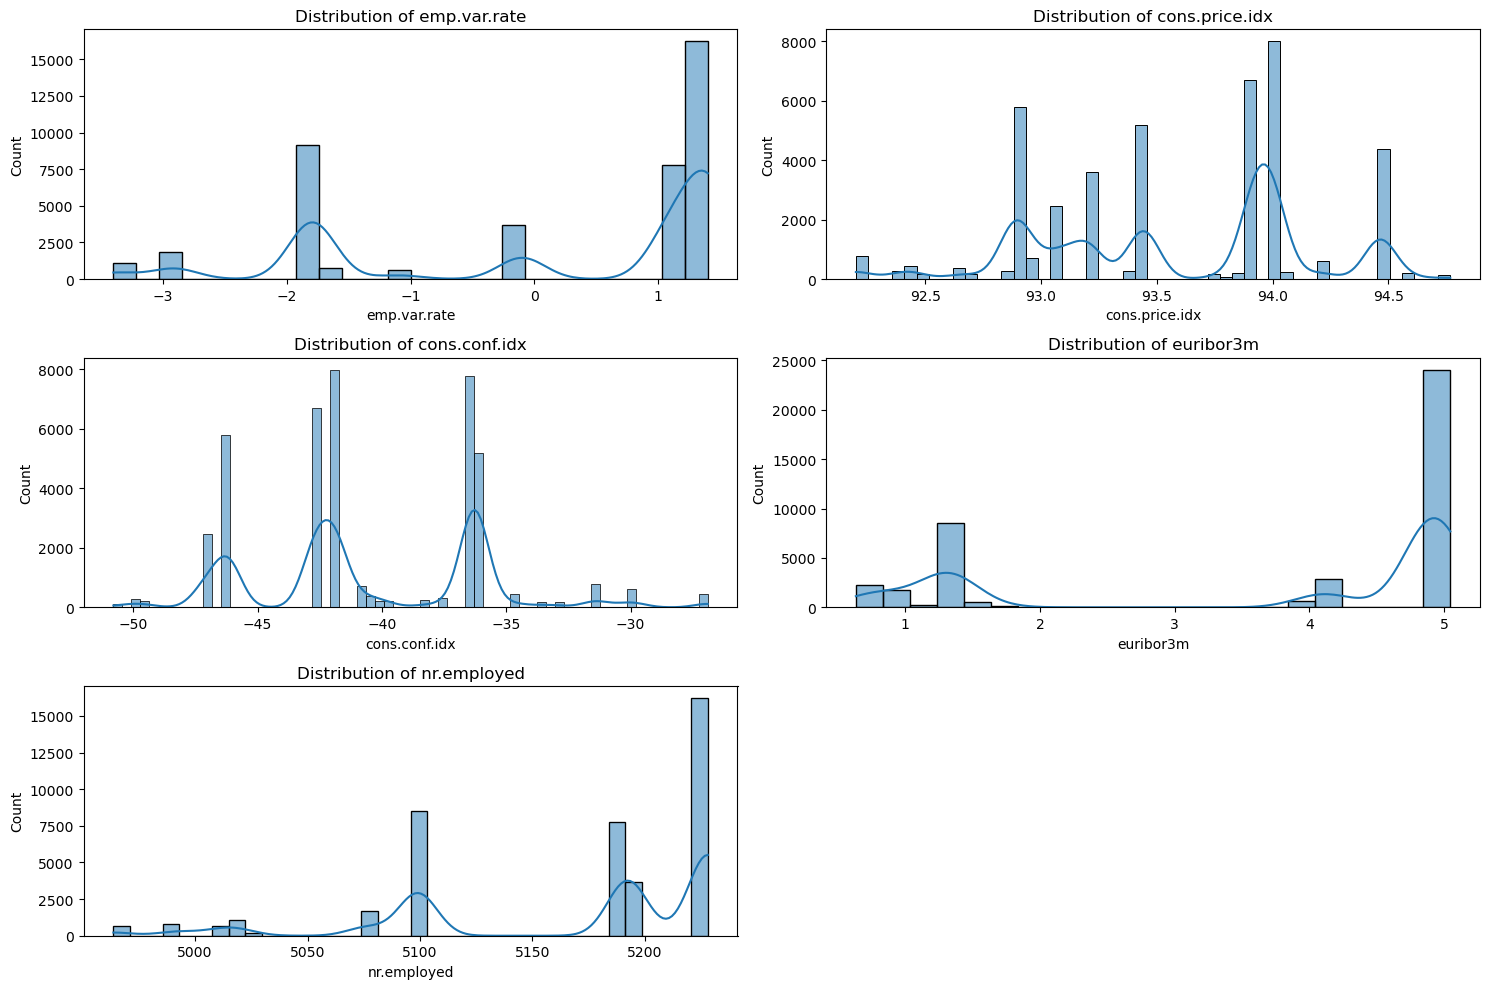

In [54]:
# Visualizing distributions using histograms
numerical_features = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    # 3: specifies number of rows in grid
    # 2: specifies number of columns in grid
    # i: specifies position of subplot in grid
    plt.subplot(3, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

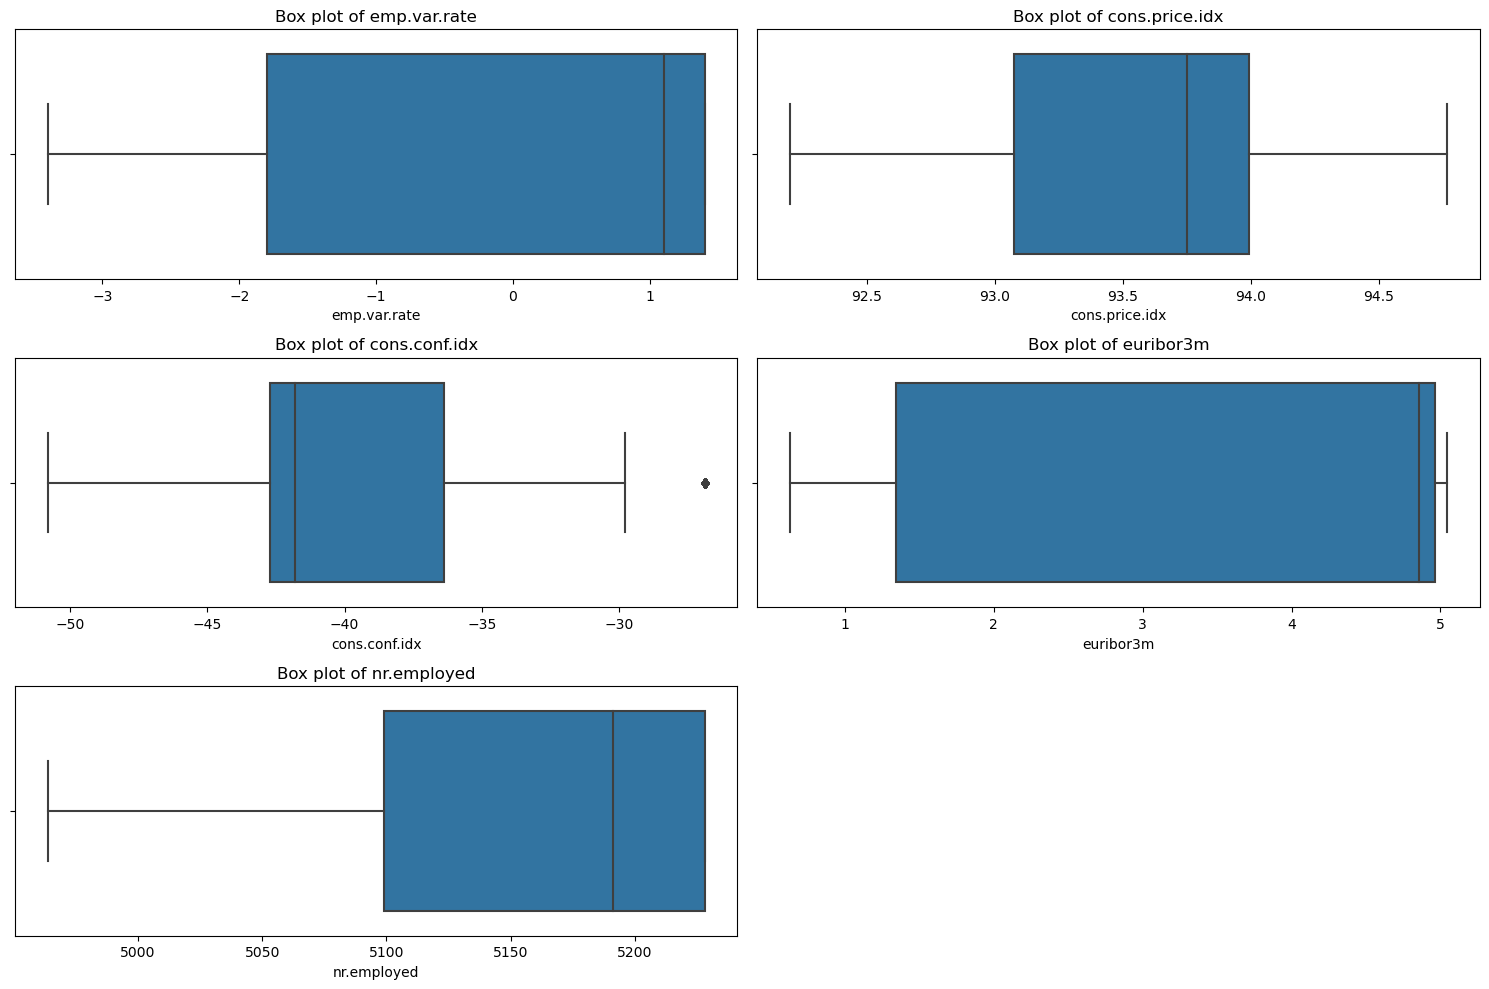

In [55]:
# Visualizing spread and detect outliers using box plots
# Box plots will help us identify outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    # 3: specifies number of rows in grid
    # 2: specifies number of columns in grid
    # i: specifies position of subplot in grid
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

**Observations:**
- Observe that only one plot contains outliers (cons.conf.idx)
- We will remove the outlier in 'cons.conf.idx' 

#### Removing Outlier in 'cons.conf.idx'

In [56]:
# Exploring lower bound and upper bound using Interquartile Range (IQR)   
Q1 = df['cons.conf.idx'].quantile(0.25)
Q3 = df['cons.conf.idx'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound_cons_conf_idx = Q1 - 1.5 * IQR
upper_bound_cons_conf_idx = Q3 + 1.5 * IQR

# Filter the DataFrame to retain only values within the lower and upper bounds
print('Lower bound: ', lower_bound_cons_conf_idx)
print('Upper bound: ', upper_bound_cons_conf_idx)

Lower bound:  -52.150000000000006
Upper bound:  -26.949999999999992


In [57]:
# Remove upper bound outliers
df = df[(df['cons.conf.idx'] < upper_bound_cons_conf_idx)];

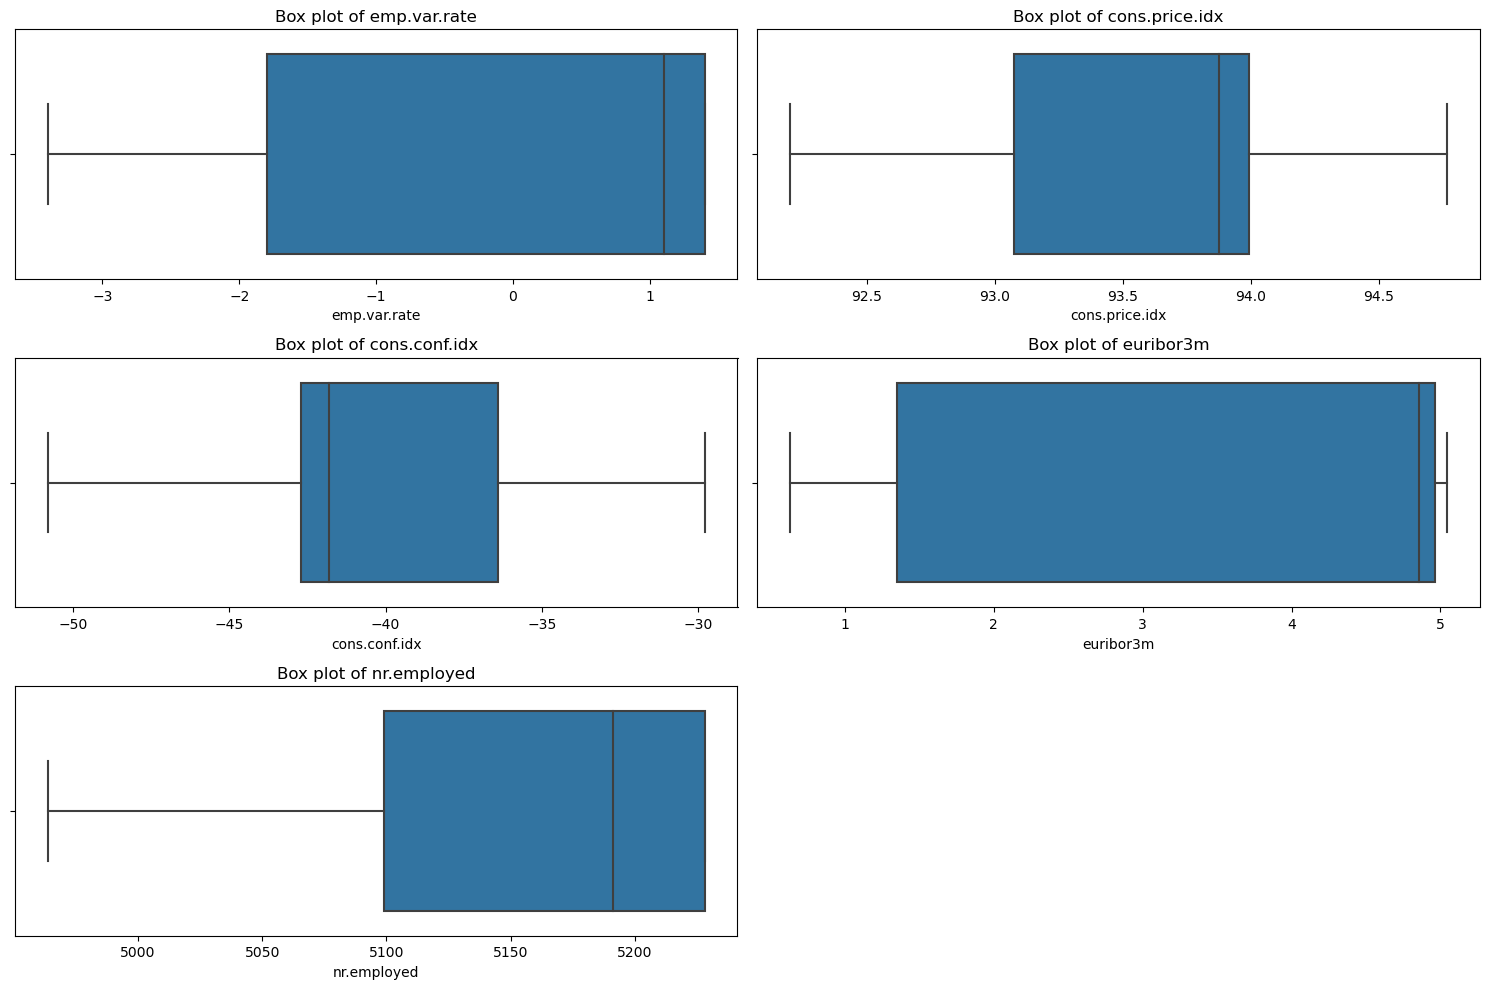

In [58]:
# Verifying that outlier has been removed
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    # 3: specifies number of rows in grid
    # 2: specifies number of columns in grid
    # i: specifies position of subplot in grid
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

#### Coverting Categorical Variable into Numerical Variables

1. First converting categorical variables that have ordinal ranking

In [59]:
# Instantiate OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[education_list], dtype=int)

# Fit and transform education feature in original dataframe
# OrdinalEncoder expects 2D array as input, need to add [[]] even when dealing with a single column
df['education'] = ordinal_encoder.fit_transform(df[['education']])

2. One hot encoding remainder categorical variables

In [60]:
# extracting columns with object data type
object_columns_complete = df.select_dtypes(include=['object'])

In [61]:
object_columns_complete

,job,marital,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,no,no,no,telephone,may,mon,nonexistent
1,services,married,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,no,no,no,telephone,may,mon,nonexistent
4,services,married,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...
41183,retired,married,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,no,no,no,cellular,nov,fri,nonexistent


In [62]:
# One hot encoding using pd.get_dummies
ohe_features_complete = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

df = pd.get_dummies(df, columns=ohe_features_complete)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40741 entries, 0 to 41187
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   40741 non-null  int64  
 1   education             40741 non-null  int64  
 2   campaign              40741 non-null  int64  
 3   previous              40741 non-null  int64  
 4   emp.var.rate          40741 non-null  float64
 5   cons.price.idx        40741 non-null  float64
 6   cons.conf.idx         40741 non-null  float64
 7   euribor3m             40741 non-null  float64
 8   nr.employed           40741 non-null  float64
 9   y                     40741 non-null  int64  
 10  job_admin.            40741 non-null  uint8  
 11  job_blue-collar       40741 non-null  uint8  
 12  job_entrepreneur      40741 non-null  uint8  
 13  job_housemaid         40741 non-null  uint8  
 14  job_management        40741 non-null  uint8  
 15  job_retired        

In [64]:
# Drop duplicates
df.drop_duplicates(inplace=True)

Note: Preprocessing complete. Do not believe need any feature engineering required

### 11b. Modeling with hyperparameter tuning and Grid Search

In this section, we will improve the base models with hyperparameter tuning. More specifically, we will use GridSearch to search fo the best combination of hyperparameters. Additionally, we will adjust the performance metric used. In the base models, we used accuracy as the performance metric to evaluate. However, accuracy may not be a reliable metric because of the significant class imbalance (in the target variable). Instead, we should look to other metrics such as precision and recall. While both are important, I believe that recall is the more important metric to consider if the goal is the identify more clients who are likely to subscribe to a term deposit. For this reason, the following models will have 'scoring' parameter set to recall.

In [65]:
# re-assign y
y = df['y']

In [66]:
# drop target variable
df = df.drop(columns = ['y'], axis = 1)

In [67]:
# Create new Train and Test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df, y, test_size = 0.3, stratify = y, random_state = 42)

In [68]:
# Distribution of y_train
y_train_new.value_counts(normalize = True)

0    0.886685
1    0.113315
Name: y, dtype: float64

In [69]:
# Distribution of y_test
y_test_new.value_counts(normalize = True)

0    0.886636
1    0.113364
Name: y, dtype: float64

In [70]:
# Creating lists to store fit time, train accuracy and test accuracy
# These will be used for reporting results in dataframe
model_list_2 = []
time_list_2 = []
test_recall = []
test_accuracy_2 = []

### Improved Logistic Regression 

In [71]:
# Creating pipeline 
lr_pipe = Pipeline([
        ('scale', StandardScaler()),
        ('model', LogisticRegression(solver = 'liblinear', random_state=42, max_iter = 10000))
    ])

lr_pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 LogisticRegression(max_iter=10000, random_state=42,
                                    solver='liblinear'))])

In [72]:
# Define Parameter Grid
# Experimented with C range - higher c value correlates to weaker regularization
params = {'model__penalty':['l1','l2'], 'model__C': [0.01,0.1,1,10,100,1000]}
lgr_grid = GridSearchCV(lr_pipe, param_grid=params, scoring = 'recall')
lgr_grid.fit(X_train_new, y_train_new)

GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=42,
                                                           solver='liblinear'))]),
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100, 1000],
                         'model__penalty': ['l1', 'l2']},
             scoring='recall')

In [73]:
# To view the best parameters and score
print("Best parameters found: ", lgr_grid.best_params_)
print("Best cross-validation score: ", lgr_grid.best_score_)

Best parameters found:  {'model__C': 10, 'model__penalty': 'l1'}
Best cross-validation score:  0.21877022653721684


In [74]:
# Extract mean fit time from grid object
# Computing mean fit time
lgr_mean_fit_time = lgr_grid.cv_results_['mean_fit_time']
lgr_final_time = np.mean(lgr_mean_fit_time)

In [75]:
# Predictions using train set
lgr_grid_train_predictions = lgr_grid.predict(X_train_new)

# Predictions using test set
lgr_grid_test_predictions = lgr_grid.predict(X_test_new)

# Compute accuracy score for Train and Test
lgr_grid_train_accuracy = accuracy_score(y_train_new, lgr_grid_train_predictions)
lgr_grid_test_accuracy = accuracy_score(y_test_new, lgr_grid_test_predictions)

print(f"Training accuracy: {lgr_base_train_accuracy:.4f}")
print(f"Testing accuracy: {lgr_base_test_accuracy:.4f}")

Training accuracy: 0.8873
Testing accuracy: 0.8874


**Observations:**
- No improvements in the train and test accuracy
- As mentioned before, accuracy is not a reliable metric to use
- Will look at classificaiton report to view recall score of testing set

In [76]:
# Display classification report
print(classification_report(y_test_new, lgr_grid_test_predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10363
           1       0.66      0.23      0.34      1325

    accuracy                           0.90     11688
   macro avg       0.79      0.61      0.64     11688
weighted avg       0.88      0.90      0.88     11688



**Observations:**
- Recall score for the minority class is relatively low at 0.23

In [77]:
# appending results
model_list_2.append('Logistic Regression')
time_list_2.append(lgr_final_time)
test_recall.append('0.23')
test_accuracy_2.append(lgr_grid_test_accuracy)

Before we move on to the next model, we can view **feature importance** by looking at each feature's coefficient

In [78]:
# Retrieve the best logistic regression model
best_lr_model = lgr_grid.best_estimator_.named_steps['model']

# Extract coefficients
coefficients = best_lr_model.coef_[0]
features = X_train_new.columns 

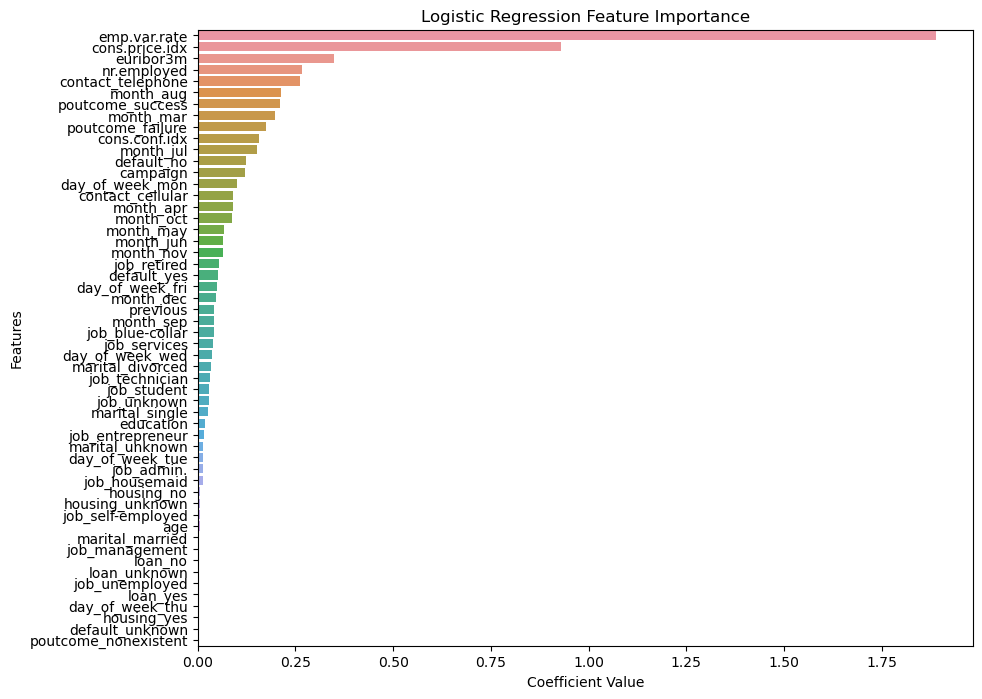

In [79]:
# Creating feature importance dataframe
feature_importance_lr = pd.DataFrame({
    'Coefficient': coefficients,
    'Absolute_Coefficient': abs(coefficients)
}, index=features).sort_values(by='Absolute_Coefficient', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Absolute_Coefficient', y=feature_importance_lr.index, data=feature_importance_lr)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Logistic Regression Feature Importance')
plt.show()

In [80]:
# Displaying feature_importance dataframe
feature_importance_lr

,Coefficient,Absolute_Coefficient
emp.var.rate,-1.888455,1.888455
cons.price.idx,0.929644,0.929644
euribor3m,0.347712,0.347712
nr.employed,0.266604,0.266604
contact_telephone,-0.261576,0.261576
month_aug,0.213454,0.213454
poutcome_success,0.209191,0.209191
month_mar,0.196337,0.196337
poutcome_failure,-0.173941,0.173941
cons.conf.idx,0.155700,0.155700


**Observations:**
- Majority of the social and economic attributes that we explored earlier are key drivers for clients subscribing to a term deposit
- August, March and July are the best months for getting clients to subscribe to term deposit
- Successful previous marking campaign also key driver for client subscription
- With respect to the client, retired clients are more likely to subscribe to term deposit

### Improved KNN

In [81]:
# Creating pipeline
knn_pipe = Pipeline([
         ('scale', StandardScaler()),
         ('model', KNeighborsClassifier())
    ])
knn_pipe

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsClassifier())])

In [82]:
# Define grid parameters

# Originally used range(1, 101, 2) which took very long possibly due to size of dataset
# Experimented with the range of n_neighbors
knn_pipe_params = {'model__n_neighbors': range(1, 30, 2)}
knn_grid = GridSearchCV(knn_pipe, param_grid=knn_pipe_params)
knn_grid.fit(X_train_new, y_train_new)

GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': range(1, 30, 2)})

In [83]:
# Get best params
# To view the best parameters and score
print("Best parameters found: ", knn_grid.best_params_)
print("Best cross-validation score: ", knn_grid.best_score_)

Best parameters found:  {'model__n_neighbors': 25}
Best cross-validation score:  0.8966225028884697


In [84]:
# Computing mean fit time
knn_mean_fit_time= knn_grid.cv_results_['mean_fit_time']
knn_final_time = np.mean(knn_mean_fit_time)

In [85]:
# Predictions using train set
knn_grid_train_predictions = knn_grid.predict(X_train_new)

# Predictions using test set
knn_grid_test_predictions = knn_grid.predict(X_test_new)

# Compute accuracy score for Train and Test
knn_grid_train_accuracy = accuracy_score(y_train_new, knn_grid_train_predictions)
knn_grid_test_accuracy = accuracy_score(y_test_new, knn_grid_test_predictions)

print(f"Training accuracy: {knn_grid_train_accuracy:.4f}")
print(f"Testing accuracy: {knn_grid_test_accuracy:.4f}")

Training accuracy: 0.9011
Testing accuracy: 0.8966


In [86]:
# Display classification report
print(classification_report(y_test_new, knn_grid_test_predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10363
           1       0.62      0.22      0.33      1325

    accuracy                           0.90     11688
   macro avg       0.77      0.60      0.63     11688
weighted avg       0.88      0.90      0.87     11688



**Observations:**
- Recall score of the minority class (0.22) is comparable to that of Logistic Regression

In [87]:
# appending results
model_list_2.append('KNN')
time_list_2.append(knn_final_time)
test_recall.append('0.22')
test_accuracy_2.append(knn_grid_test_accuracy)

### Improved Decision Tree

In [88]:
# Creating pipeline
tree_pipe = Pipeline([
        ('scale', StandardScaler()),
        ('model', DecisionTreeClassifier(random_state=42))
    ])

tree_pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('model', DecisionTreeClassifier(random_state=42))])

In [89]:
# Define Parameter Grid
params = {'model__max_depth': range(1, 30)}

tree_grid = GridSearchCV(tree_pipe, param_grid=params, scoring = 'recall')
tree_grid.fit(X_train_new, y_train_new)

GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'model__max_depth': range(1, 30)}, scoring='recall')

In [90]:
# Get best params
# To view the best parameters and score
print("Best parameters found: ", tree_grid.best_params_)
print("Best cross-validation score: ", tree_grid.best_score_)

Best parameters found:  {'model__max_depth': 28}
Best cross-validation score:  0.3343042071197411


In [91]:
# Computing mean fit time
tree_mean_fit_time= tree_grid.cv_results_['mean_fit_time']
tree_final_time = np.mean(tree_mean_fit_time)

In [92]:
# Computing Train and Test accuracy

# Predictions using train set
decision_tree_grid_train_predictions = tree_grid.predict(X_train_new)

# Predictions using test set
decision_tree_grid_test_predictions = tree_grid.predict(X_test_new)

# Compute accuracy score for Train and Test
decision_tree_grid_train_accuracy = accuracy_score(y_train_new, decision_tree_grid_train_predictions)
decision_tree_grid_test_accuracy = accuracy_score(y_test_new, decision_tree_grid_test_predictions)

print(f"Training accuracy: {decision_tree_grid_train_accuracy:.4f}")
print(f"Testing accuracy: {decision_tree_grid_test_accuracy:.4f}")

Training accuracy: 0.9938
Testing accuracy: 0.8376


In [93]:
# Display classification report
print(classification_report(y_test_new, decision_tree_grid_test_predictions))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     10363
           1       0.30      0.32      0.31      1325

    accuracy                           0.84     11688
   macro avg       0.61      0.61      0.61     11688
weighted avg       0.84      0.84      0.84     11688



**Observations:**
- Recall score of the minority class is slightly higher at 0.32 compared to the previous two models. However, improvement of recall score comes at the expense of precision score

In [94]:
# appending results
model_list_2.append('Decision Tree')
time_list_2.append(tree_final_time)
test_recall.append('0.32')
test_accuracy_2.append(decision_tree_grid_test_accuracy)

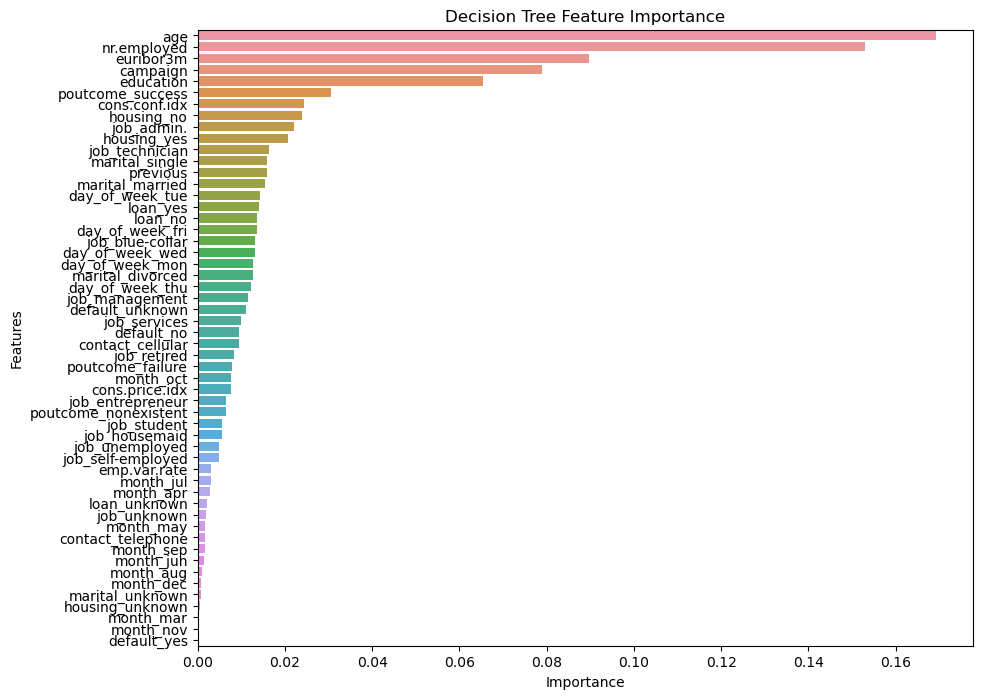

In [95]:
# Retrieving the best decision tree model
best_tree_model = tree_grid.best_estimator_.named_steps['model']

# Extracting feature importances
feature_importances = best_tree_model.feature_importances_
features = X_train_new.columns  # Ensure X_train is the DataFrame used for training with proper feature names

# Create a DataFrame for feature importance
feature_importance_tree_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_tree_df)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.show()

**Observations:**
- Age and education are important features 
- Social and economic attributes like number of employees and euribor 3 month rate also important. This overlaps with the feature importance results in the logistic regression model
- Successful previous marketing campaign also important
- With respect to client, clients whose job title is admin or technician are more likely to subscribe to a term deposit.

### Improved SVM

In [96]:
# Creating pipeline 
svm_pipe = Pipeline([
        ('scale', StandardScaler()),
        ('model', SVC(probability=True, coef0=1))
    ])

svm_pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('model', SVC(coef0=1, probability=True))])

In [97]:
# Define parameter grid
# including all three parameters: kernal, degree and gamma took very long
# attempted to include only kernal and gamma but fit time remained very long
# gamma can take on numeric values or predefined options like 'scale' and 'auto'
# params = {'model__kernel': ('linear', 'poly'),'model__gamma': ['scale', 'auto']}
# svm_grid = GridSearchCV(svm_pipe, param_grid=params, scoring = 'recall')
# svm_grid.fit(X_train, y_train)

**Notes:**
- Overall, SVM appears computationally expensive, especially with large datasets and multiple hyperparameters to tune. This aligns with the longer fit time we saw with the base model.
- Utlimately, I was unable to run the full svm grid search even after removing some parameters from params. **Therefore, no results were obtained for this model and the code above has been commented out.**
- Future considerations to potentially make the process more efficient:
    - further reduce the dataset size 
    - perform RandomizedSearchCV instead of full GridSearchCV

### Summarizing results for updated models

In [98]:
updated_model_results_df = pd.DataFrame({'Model': model_list_2, 'Mean Fit Time (seconds)': time_list_2, 'Test Recall Score' : test_recall, 'Test Accuracy': test_accuracy_2})
updated_model_results_df

,Model,Mean Fit Time (seconds),Test Recall Score,Test Accuracy
0,Logistic Regression,2.264442,0.23,0.899555
1,KNN,0.029519,0.22,0.896561
2,Decision Tree,0.137322,0.32,0.837611


**Observations:**
- Decision Tree model achieves highest recall score, but the test accuracy slightly drops

**Note:**
- No results were obtained for updated SVM due to long run time.

### 12. Recap and Findings

### 12a. Recap:

- First, we explored the dataset and found that there was **siginificant class imbalance in the target variable**.
- We then built 4 models (Logistic Regression, KNN, Decision Tree and SVM) using features related to bank client. For these models, we compared fit time along with Training and Testing accuracy. All models shared similar performances in terms of accuracy and fit time (SVM took the longest).
- Next, we proceeded to improve our models using GridSearch to find the best combination of hyperparameters. Since the goal is to identify more clients who are likely to subscribe to a term deposit, we **set 'scoring' parameter to recall (focus on getting best recall score)**.
- To gain insight into which features are key drivers of client subscription, we looked at the **coefficient/ feature importance in the logistice regression and decision tree model**

### 12b. Findings:

- Among the 4 models, SVM took the longest to fit. Given the long fit time, this suggests that SVM is computationally expensive, especially with larger datasets and multiple hyperparameters to tune. In order to utilize SVM, it may be necessary to further reduce the size of the dataset or perform RandomizedSearchCV instead of full GridSearchCV.
- The improved Decision Tree model achieved the highest recall score (0.32) at the expense of precision score compared to that of Logsitic Regression Model and KNN.
- Able to extract feature importance from both Logistic Regression Model and Decision Tree. These two models allow for better interpretation of our results. More specifically, we found that several social and economic attributes are key drivers for client subscription. Additionally, features like age, education, previous marketing campaign success and particular months (August, March, July) are also important to consider.

### 13. Future Consideration and Next Steps:

Overall, we were able to gain meaningful insight into key drivers for client subscription for term deposit. While the Decision Tree model achieved the highest recall score, the score is still relatively low. Further preprocessing and hyperparameter tuning are necessary to optimize the recall score. Additionally, it would be beneficialt to retry using the SVM after reducing the size of the dataset.

##### Questions